In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#dados do Yelp
df_negocios = pd.read_parquet('yelp_academic_dataset_business_cleaned.parquet')


X = df_negocios.drop(columns=['RestaurantsPriceRange2', 'business_id']).select_dtypes(include='number').fillna(0).values  
y = df_negocios['RestaurantsPriceRange2'].fillna(0).values #coluna alvo faixa de preço


Matriz de Confusão:
[[ 4433  6751    59     8]
 [ 2484 28746   220    18]
 [  284  1673    39     2]
 [   59   284    11     2]]

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.61      0.39      0.48     11251
         2.0       0.77      0.91      0.83     31468
         3.0       0.12      0.02      0.03      1998
         4.0       0.07      0.01      0.01       356

    accuracy                           0.74     45073
   macro avg       0.39      0.33      0.34     45073
weighted avg       0.69      0.74      0.70     45073


Acurácia:
0.7370266012912386


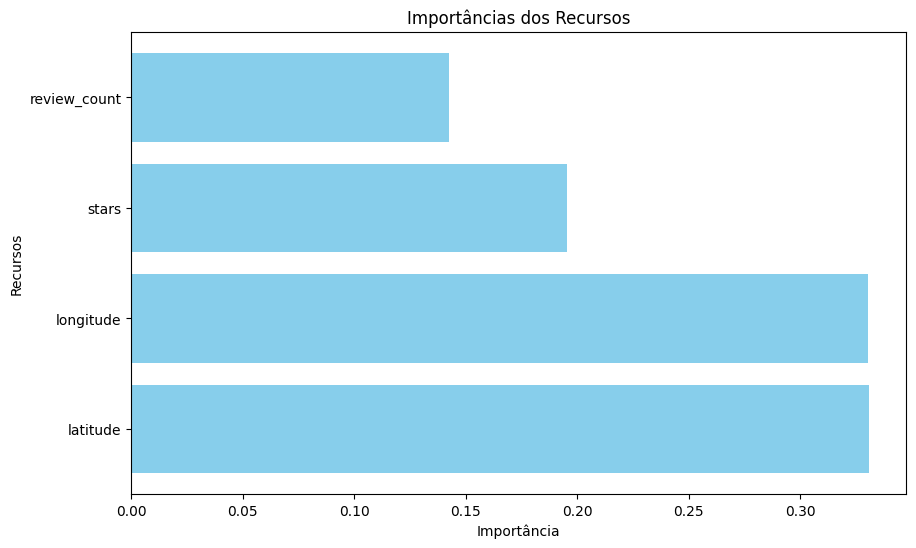

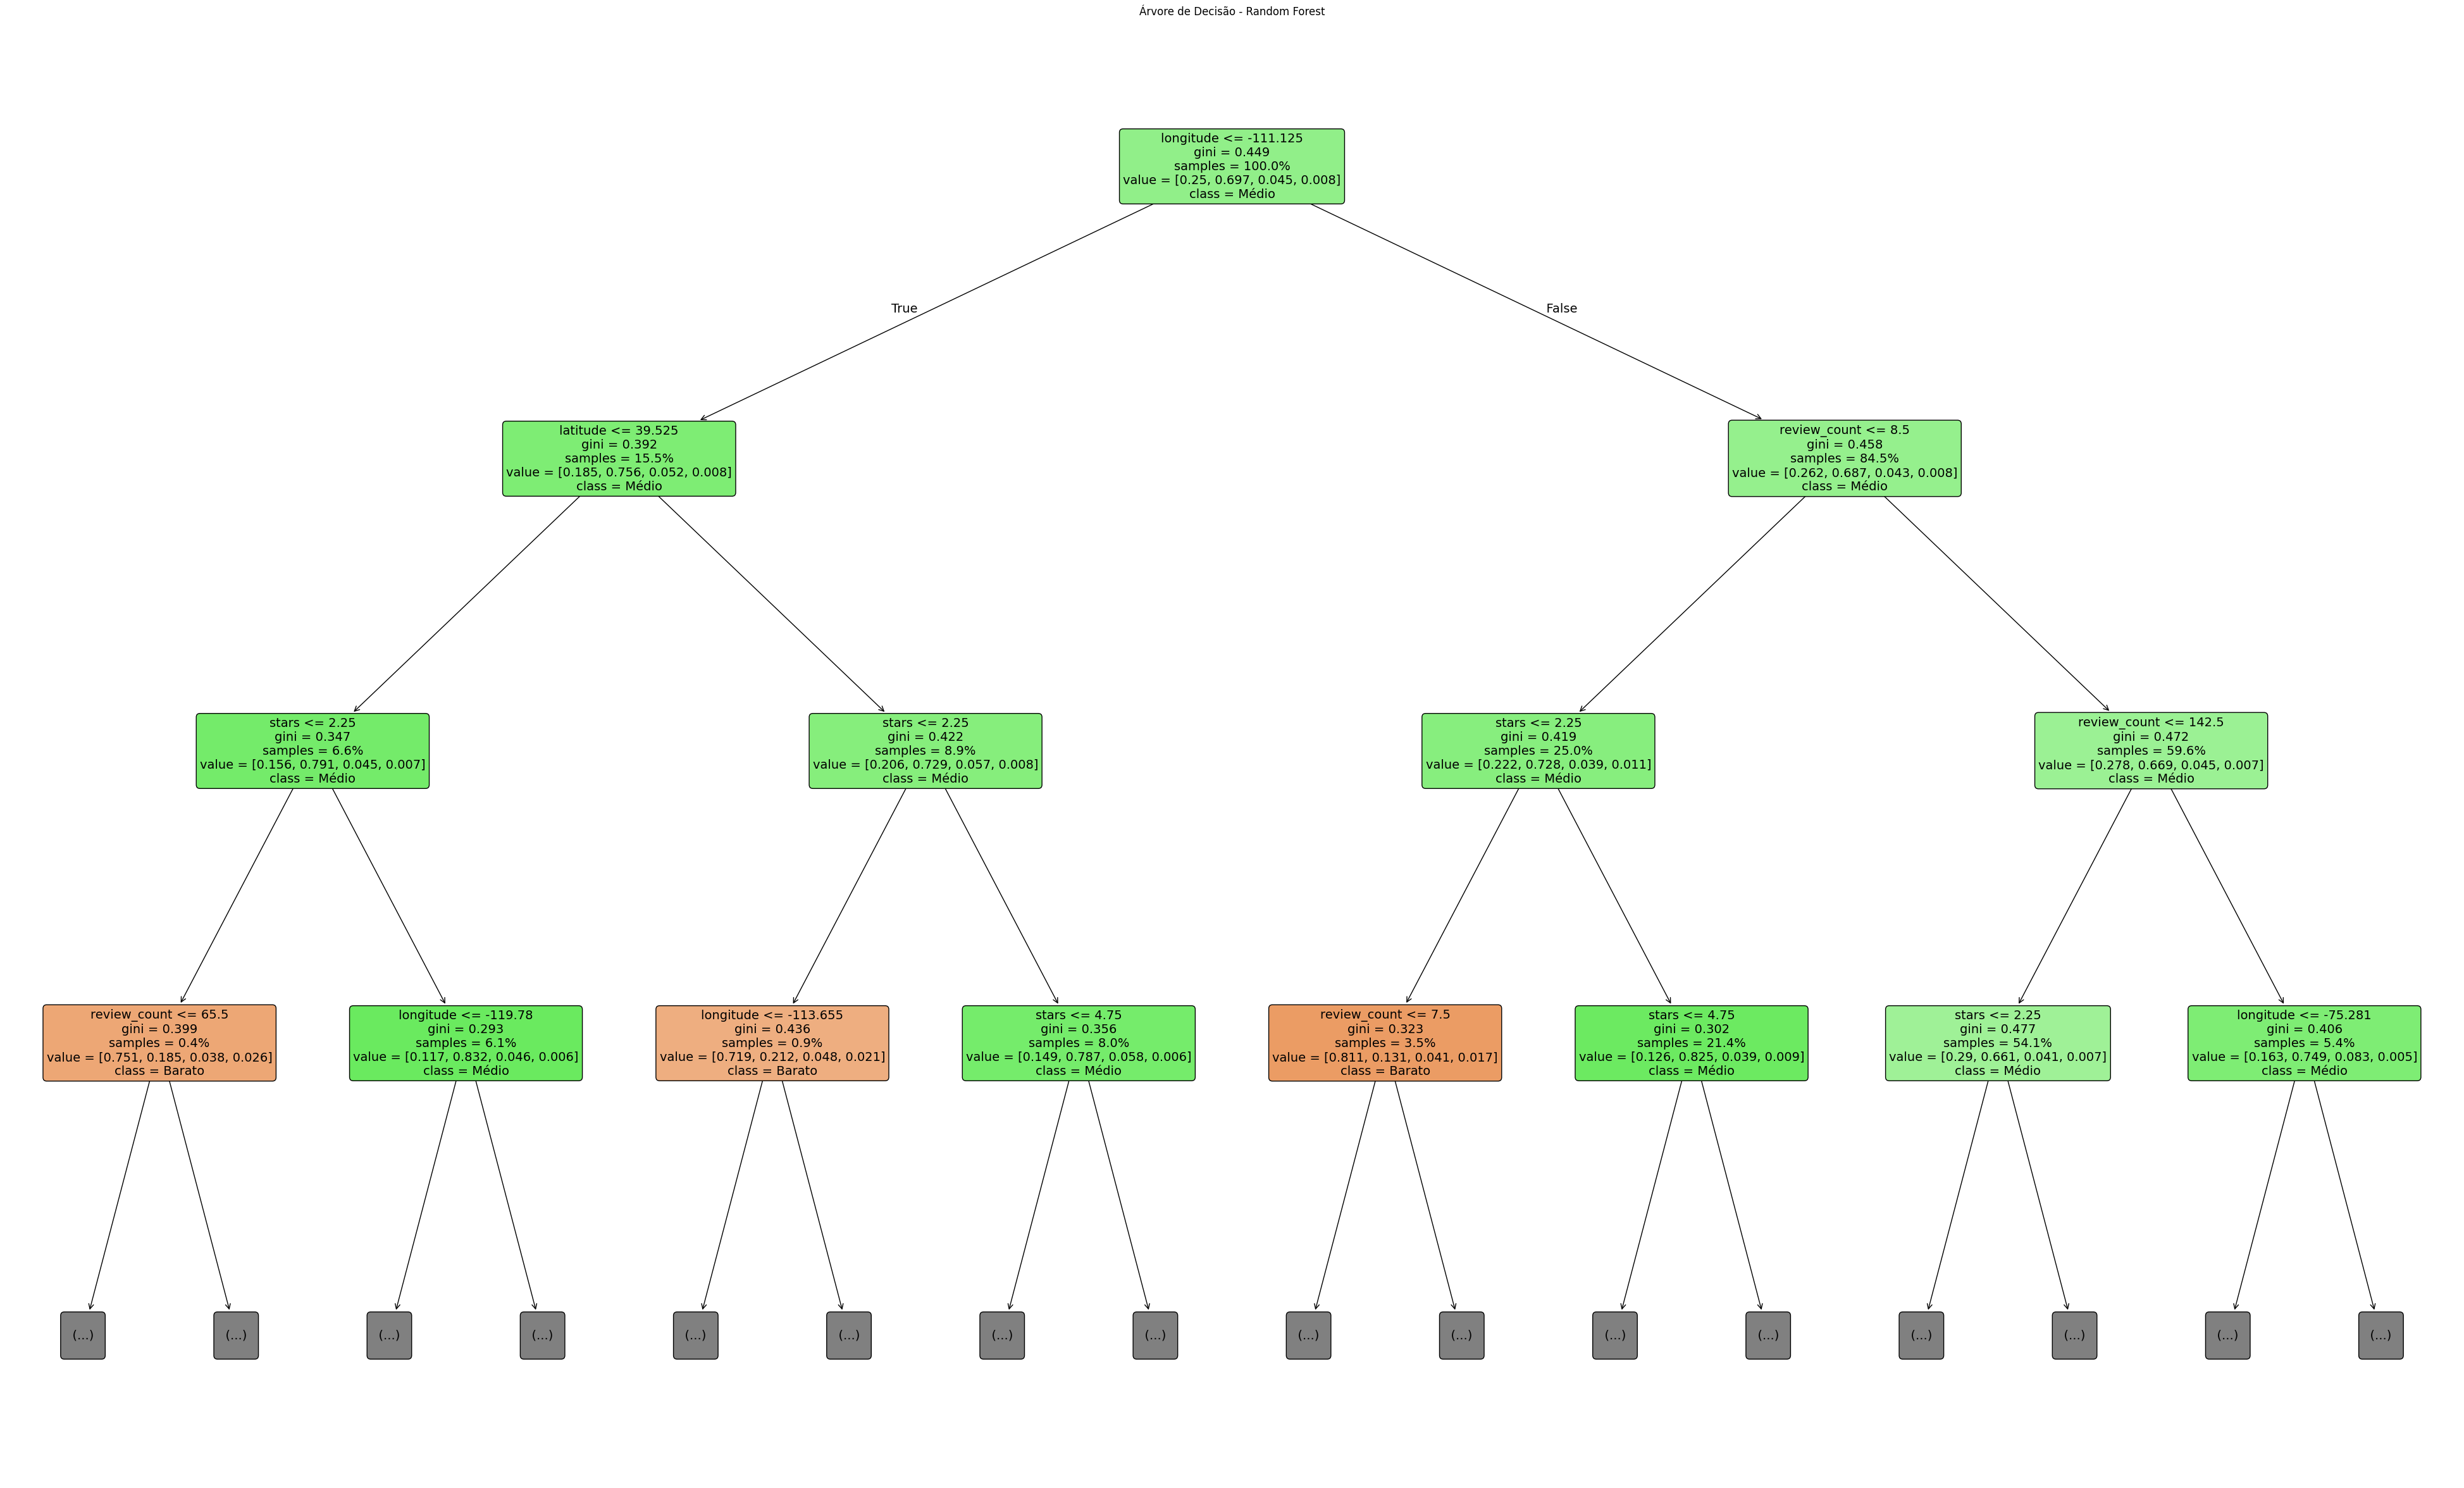

In [33]:
#num de arvores
clf = RandomForestClassifier(n_estimators=100, random_state=42)

ss = ShuffleSplit(n_splits=1, train_size=0.7, test_size=0.3, random_state=42)

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    clf.fit(X_train, y_train)   
    
    y_pred = clf.predict(X_test)
    
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    
    print("\nAcurácia:")
    print(accuracy_score(y_test, y_pred))

#recursos
importances = clf.feature_importances_
feature_names = df_negocios.drop(columns=['RestaurantsPriceRange2', 'business_id']).select_dtypes(include='number').columns


#importâncias dos recursos
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, color='skyblue')
plt.yticks(range(len(importances)), feature_names)
plt.title("Importâncias dos Recursos")
plt.xlabel("Importância")
plt.ylabel("Recursos")
plt.savefig('feature_importance.png')
plt.show()

#árvore de decisão
plt.figure(figsize=(50,30))
plot_tree(
    clf.estimators_[0], 
    feature_names=feature_names,
    class_names=['Barato', 'Médio', 'Caro', 'Muito Caro'],
    filled=True,
    rounded=True,
    fontsize=14,
    max_depth=3,
    proportion=True,
)
plt.title("Árvore de Decisão - Random Forest")
plt.savefig('decision_tree_plot.png')
plt.show()